In [56]:
# Constants
max_iterations = 0
random_state = 57
plot_them = 0

In [57]:
url = 'https://www.kaggle.com/mlg-ulb/creditcardfraud'

In [58]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import datetime
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time, sys
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [59]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [60]:
file = 'creditcard.csv'
path = path="../../../../Datafiles/"
df = pd.read_csv((path+file)).dropna()

print("there are {:,} entries in the data file {}".format(len(df), file))

there are 284,807 entries in the data file creditcard.csv


In [61]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
5,2.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,-0.371,1.341,0.360,-0.358,-0.137,0.518,0.402,-0.058,0.069,-0.033,0.085,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,3.670,0
6,4.000,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,-0.099,-1.417,-0.154,-0.751,0.167,0.050,-0.444,0.003,-0.612,-0.046,-0.220,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0
7,7.000,-0.644,1.418,1.074,-0.492,0.949,0.428,1.121,-3.808,0.615,1.249,-0.619,0.291,1.758,-1.324,0.686,-0.076,-1.222,-0.358,0.325,-0.157,1.943,-1.015,0.058,-0.650,-0.415,-0.052,-1.207,-1.085,40.800,0
8,7.000,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.200,0
9,9.000,-0.338,1.120,1.044,-0.222,0.499,-0.247,0.652,0.070,-0.737,-0.367,1.018,0.836,1.007,-0.444,0.150,0.739,-0.541,0.477,0.452,0.204,-0.247,-0.634,-0.121,-0.385,-0.070,0.094,0.246,0.083,3.680,0


In [62]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
# Definine outcome and predictors.
print("the current time of start is {}".format(str(datetime.datetime.now())))

y = df['Class']
# X = df.loc[:, ~df.columns.isin(['Class', 'Time'])]
X = df[['V17','V12','V14','V16', 'V11', 'V10', 'V9', 'V18', 'V4', 'V7', 'V3', 'V2', 'V5', 'V8', 'V26', 'Amount']]

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
print("the current time of end is {}".format(str(datetime.datetime.now())))

the current time of start is 2019-05-29 21:49:49.013049
the current time of end is 2019-05-29 21:49:49.027118


In [64]:
# y.sample(100)
# df.groupby('Class').count()
X.head(20)
# scale them all - sklearn - preprocessing.scale -> get variance, better distribution

,V17,V12,V14,V16,V11,V10,V9,V18,V4,V7,V3,V2,V5,V8,V26,Amount
0,0.208,-0.618,-0.311,-0.470,-0.552,0.091,0.364,0.026,1.378,0.240,2.536,-0.073,-0.338,0.099,-0.189,149.620
1,-0.115,1.065,-0.144,0.464,1.613,-0.167,-0.255,-0.183,0.448,-0.079,0.166,0.266,0.060,0.085,0.126,2.690
2,1.110,0.066,-0.166,-2.890,0.625,0.208,-1.515,-0.121,0.380,0.791,1.773,-1.340,-0.503,0.248,-0.139,378.660
3,-0.684,0.178,-0.288,-1.060,-0.226,-0.055,-1.387,1.966,-0.863,0.238,1.793,-0.185,-0.010,0.377,-0.222,123.500
4,-0.237,0.538,-1.120,-0.451,-0.823,0.753,0.818,-0.038,0.403,0.593,1.549,0.878,-0.407,-0.271,0.502,69.990
5,-0.058,0.360,-0.137,0.402,1.341,-0.371,-0.569,0.069,-0.168,0.476,1.141,0.961,0.421,0.260,0.106,3.670
6,0.003,-0.154,0.167,-0.444,-1.417,-0.099,0.465,-0.612,1.203,-0.005,0.045,0.141,0.192,0.081,-0.257,4.990
7,-1.222,0.291,-1.324,-0.076,-0.619,1.249,0.615,-0.358,-0.492,1.121,1.074,1.418,0.949,-3.808,-0.052,40.800
8,-0.500,-0.110,0.074,-0.210,-0.705,-0.410,-0.392,0.119,-0.272,0.370,-0.113,0.286,2.670,0.851,-0.384,93.200
9,-0.541,0.836,-0.444,0.739,1.018,-0.367,-0.737,0.477,-0.222,0.652,1.044,1.120,0.499,0.070,0.094,3.680


In [65]:
X.head(20)

,V17,V12,V14,V16,V11,V10,V9,V18,V4,V7,V3,V2,V5,V8,V26,Amount
0,0.208,-0.618,-0.311,-0.470,-0.552,0.091,0.364,0.026,1.378,0.240,2.536,-0.073,-0.338,0.099,-0.189,149.620
1,-0.115,1.065,-0.144,0.464,1.613,-0.167,-0.255,-0.183,0.448,-0.079,0.166,0.266,0.060,0.085,0.126,2.690
2,1.110,0.066,-0.166,-2.890,0.625,0.208,-1.515,-0.121,0.380,0.791,1.773,-1.340,-0.503,0.248,-0.139,378.660
3,-0.684,0.178,-0.288,-1.060,-0.226,-0.055,-1.387,1.966,-0.863,0.238,1.793,-0.185,-0.010,0.377,-0.222,123.500
4,-0.237,0.538,-1.120,-0.451,-0.823,0.753,0.818,-0.038,0.403,0.593,1.549,0.878,-0.407,-0.271,0.502,69.990
5,-0.058,0.360,-0.137,0.402,1.341,-0.371,-0.569,0.069,-0.168,0.476,1.141,0.961,0.421,0.260,0.106,3.670
6,0.003,-0.154,0.167,-0.444,-1.417,-0.099,0.465,-0.612,1.203,-0.005,0.045,0.141,0.192,0.081,-0.257,4.990
7,-1.222,0.291,-1.324,-0.076,-0.619,1.249,0.615,-0.358,-0.492,1.121,1.074,1.418,0.949,-3.808,-0.052,40.800
8,-0.500,-0.110,0.074,-0.210,-0.705,-0.410,-0.392,0.119,-0.272,0.370,-0.113,0.286,2.670,0.851,-0.384,93.200
9,-0.541,0.836,-0.444,0.739,1.018,-0.367,-0.737,0.477,-0.222,0.652,1.044,1.120,0.499,0.070,0.094,3.680


In [66]:
# for column in X_train.columns:
#     print("column={}".format(column))
#     sns.distplot(X_train[column]*100, kde=False, bins=10)

In [77]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)

In [78]:
if plot_them == 1:
    for column in X_train.columns:
        plt.hist(X_train[column]*100, bins=40)
        plt.xlabel(column)
        plt.show()

In [79]:
def rfc_and_feature_importances(leaf_values):    # Here we are using Gradient Boosting classifier method to determine the top 30 features.
# train and then run RFC
    
    params = {'n_estimators': 500
              ,'max_depth'    : 2,
             
             }

    rfc = ensemble.RandomForestClassifier(**params)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    
    ## Fit the model on your training data.
    rfc.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rfc.score(X_test, y_test)

    feature_importance = rfc.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist()
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    return cols # return it sorted

In [80]:
# Here we will return the feature importances
all_feature_important_columns = []

for i in range(1,max_iterations):
    print('running rfc features for {} times'.format(max_iterations))
    
    print("params = {}".format(i))
    columns2 = rfc_and_feature_importances(i)
    columns2.extend('{}'.format(i))
    all_feature_important_columns.append(columns2)
#     print("all_feature_import_columns={}".format(all_feature_important_columns))
    
for list1 in all_feature_important_columns:
    print("important_features: {}".format(list1))

          V17    V12    V14    V16    V11    V10     V9    V18     V4     V7     V3     V2     V5     V8    V26  Amount
V17     1.000 -0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000  0.000 -0.000  0.000   0.007
V12    -0.000  1.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000  0.000  0.000 -0.000  0.000 -0.000 -0.000  -0.010
V14     0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000  0.000 -0.000 -0.000 -0.000 -0.000   0.034
V16     0.000  0.000  0.000  1.000 -0.000 -0.000 -0.000 -0.000 -0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  -0.004
V11     0.000  0.000  0.000 -0.000  1.000  0.000  0.000  0.000 -0.000 -0.000 -0.000  0.000  0.000  0.000 -0.000   0.000
V10     0.000  0.000  0.000 -0.000  0.000  1.000 -0.000  0.000  0.000  0.000  0.000 -0.000 -0.000  0.000 -0.000  -0.102
V9      0.000 -0.000  0.000 -0.000  0.000 -0.000  1.000  0.000  0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000  -0.044
V18    -0.000 -0.000  0.000 -0.000  0.00

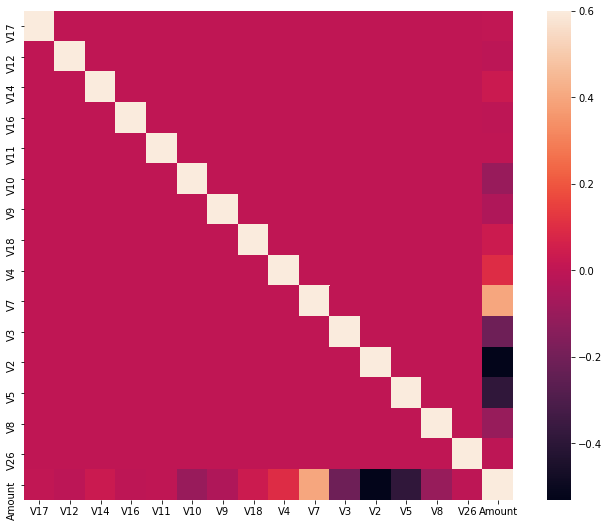

In [81]:
# Setup the correlation matrix.
corrmat = X.corr()
print(corrmat)

# Set up the subplots
f, ax = plt.subplots(figsize=(12, 9))

# Let's draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.6, square=True)
plt.show()

## Let's run the test

In [82]:
# Let's fit it with the RFC training set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

## Fit the model on your training data.
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
#Let's run cross validate score with the training data set
cross_val_score(rfc, X_train, y_train, cv=5)

array([0.99941483, 0.99964889, 0.99950259, 0.99947331, 0.99950257])

In [84]:
## Let's score it with the training data set
rfc.score(X_train, y_train)

1.0

In [85]:
## Let's score it with the test data set
rfc.score(X_test, y_test)

0.9995347734873555